# Comparison of Two Different Approaches for Creating Signals with Longer Sequence Length

- Upsampling
- Constant frequency across all sequence lengths

Let's look at how the data looks like depending on how we set the parameters.
First import some basic classes as well as the PiecewiseSinusoidal class from src.data that provides an
easy way for creating the synthetic data.
Additionally, use the InputOutputVisualization class from src.visualize to make the plotting easier

In [1]:
import numpy as np
from src.data.synthetic_dataset import PiecewiseSinusoidal, Frequency
from src.data.sampler import MeanSamplerConstant, AmplitudeSamplerConstant
from src.visualization.visualize import InputOutputVisualization

2021-07-09 11:55:46,138 - root - INFO - ================================================================================


## Now we define the different values for the data characteristics:

In [2]:
sigma = 0
min_len = 64
freqs = {"low": Frequency.LOW, "high": Frequency.HIGH}
inp_sequence_len = {str(x): x for x in [min_len, min_len*2, min_len*4, min_len*8]}
delay_lengths = {"long-term": 32, "short-term": 0}


## Amplitude Sampling
Next we have to choose how the amplitudes and mean values for the time series are sampled. To
make the visualizations more insightful we use two dummy samplers that always return the same values:

In [3]:
amplitudes_sampler = AmplitudeSamplerConstant(amplitudes=[60, 40, 20])
mean_sampler = MeanSamplerConstant(mean_value=72)

## Visualization of the Constant Frequency approach

The first approach is to keep the frequency constant across all sequence lengths.
This is done by creating an instance of the dataset synthesising class for every combination of the input variables
and saving one sample, the title description of this instance and the point where the prediction starts.

In [4]:
no_noise_samples = []
no_noise_titles = []
no_noise_pred_start = []
for inp_len_name, inp_len in inp_sequence_len.items():
    for f_name, f in freqs.items():
        for delay_length_name, delay_length in delay_lengths.items():
            pws = PiecewiseSinusoidal(
                sequence_length=inp_len * 2,
                delay_length=delay_length * inp_len // min_len,
                sigma=sigma,
                frequency=f,
                amplitude_sampler=amplitudes_sampler,
                mean_sampler=mean_sampler
            )
            no_noise_samples.append(pws.sample(1)[0])
            no_noise_titles.append(f"$f = {pws.f}, seqlen = {inp_len}, delaylen = {delay_length}$")
            no_noise_pred_start.append(inp_len)

## Visualize!
Now we can create a big plot that shows all the differnt characteristics

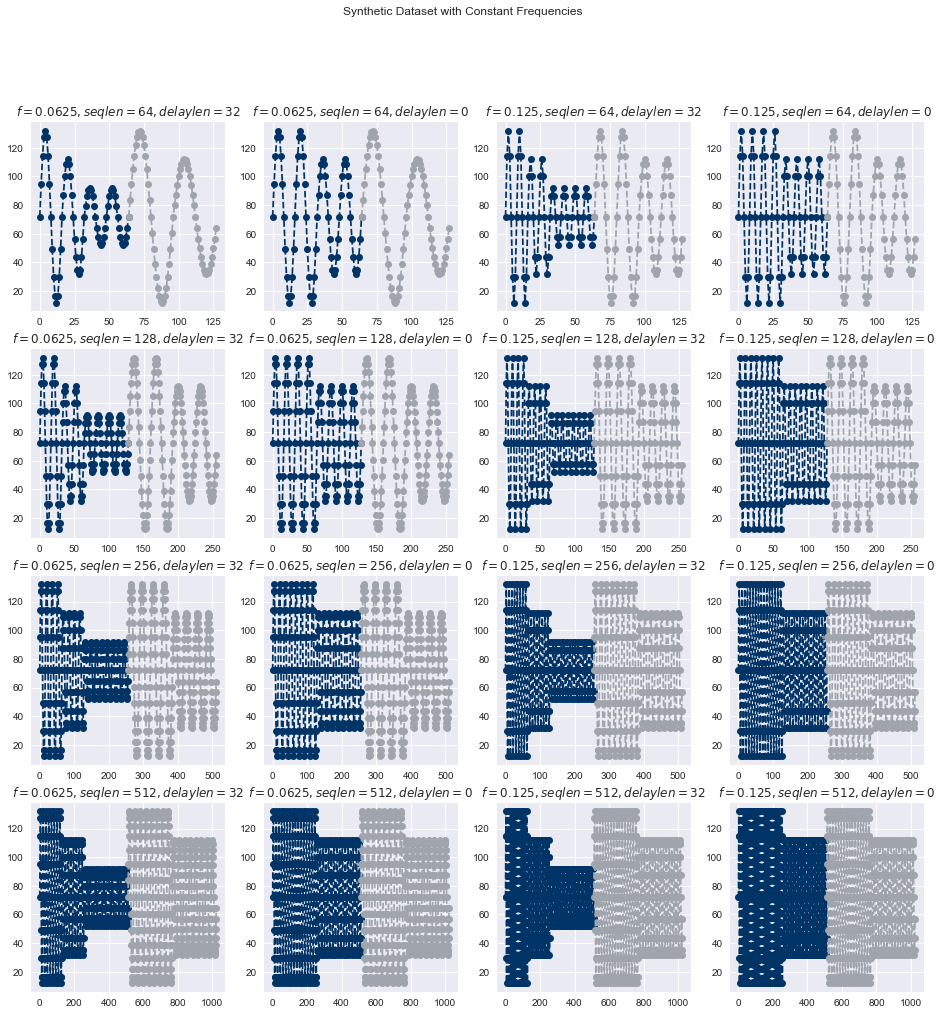

In [5]:
viz = InputOutputVisualization(use_latex_font=False)
viz.subplots(nrows=len(inp_sequence_len), ncols=len(freqs) * len(delay_lengths), figsize=(16, 16))
viz.plot(no_noise_samples, pred_starts=no_noise_pred_start)
viz.fig.suptitle("Synthetic Dataset with Constant Frequencies")
viz.add_subplot_titles(titles=no_noise_titles)
viz.save(filename="figures/no_noise_all_variations")
viz.plt.show()

# Upsampling approach
Repeat the same thing for the second approach this one is slightly different compared to

<Figure size 576x396 with 0 Axes>

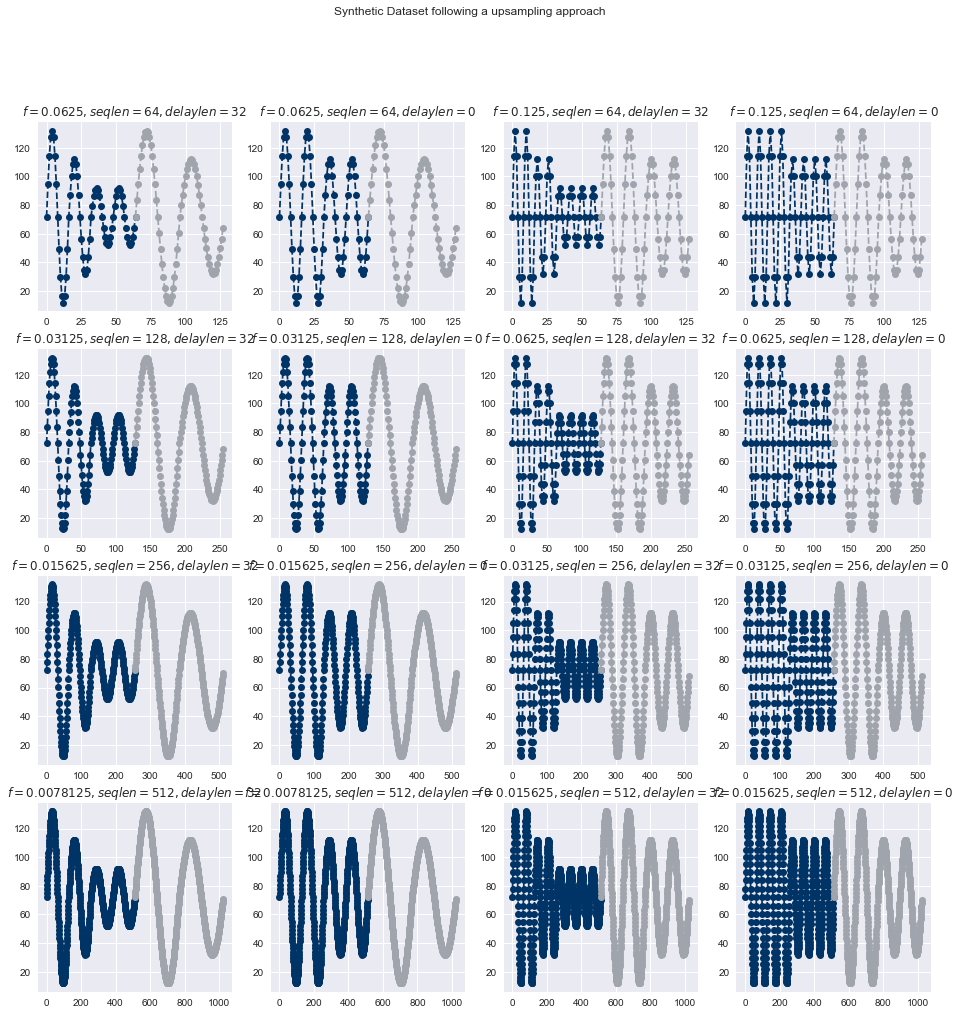

In [6]:
# noisy samples
noise_samples = []
noise_titles = []
noise_pred_start = []
np.random.seed(1)
for inp_len_name, inp_len in inp_sequence_len.items():
    for f_name, f in freqs.items():
        for delay_length_name, delay_length in delay_lengths.items():
            pws = PiecewiseSinusoidal(
                sequence_length=inp_len * 2,
                delay_length=delay_length * inp_len // min_len,
                sigma=sigma,
                frequency=f,
                amplitude_sampler=amplitudes_sampler,
                mean_sampler=mean_sampler
            )
            pws.f = f.value / (inp_len // min_len)  # This is a hack
            noise_samples.append(pws.sample(1)[0])
            noise_titles.append(f"$f = {pws.f}, seqlen = {inp_len}, delaylen = {delay_length}$")
            noise_pred_start.append(inp_len)


viz.plt.clf()
viz.subplots(nrows=len(inp_sequence_len), ncols=len(freqs) * len(delay_lengths), figsize=(16, 16))
viz.plot(noise_samples, pred_starts=noise_pred_start)
viz.fig.suptitle(f"Synthetic Dataset following a upsampling approach")
viz.add_subplot_titles(titles=noise_titles)
viz.save(filename="figures/no_noise_all_variations_upsampling")
viz.plt.show()